## Black Friday Dataset EDA And Feature Engineering
### Cleaning and preparing the data for model training

In [129]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [130]:
df_train = pd.read_csv('black_friday/train.csv')
df_train.head()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [131]:
##  import the test data
df_test=pd.read_csv('black_friday/test.csv')
df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [132]:
print(df_train.shape, df_test.shape)

(550068, 12) (233599, 11)


In [133]:
df_train['Gender'] = df_train['Gender'].map({'F':0, 'M':1})
df_test['Gender']  = df_test['Gender'].map({'F':0, 'M':1})


In [134]:
age_map = {
    '0-17':0, 
    '18-25':1, 
    '26-35':2, 
    '36-45':3, 
    '46-50':4, 
    '51-55':5, 
    '55+':6
}

df_train['Age'] = df_train['Age'].map(age_map)
df_test['Age']  = df_test['Age'].map(age_map)


In [135]:
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].str.replace('+','').astype(int)
df_test['Stay_In_Current_City_Years']  = df_test['Stay_In_Current_City_Years'].str.replace('+','').astype(int)


In [136]:
df_train['Product_Category_2'] = df_train['Product_Category_2'].fillna(0)
df_train['Product_Category_3'] = df_train['Product_Category_3'].fillna(0)

df_test['Product_Category_2'] = df_test['Product_Category_2'].fillna(0)
df_test['Product_Category_3'] = df_test['Product_Category_3'].fillna(0)



In [137]:
df_train.drop('Product_ID', axis=1, inplace=True)
df_test.drop('Product_ID', axis=1, inplace=True)


In [138]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,A,2,0,3,0.0,0.0,8370.0
1,1000001,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,0,0,10,A,2,0,12,0.0,0.0,1422.0
3,1000001,0,0,10,A,2,0,12,14.0,0.0,1057.0
4,1000002,1,6,16,C,4,0,8,0.0,0.0,7969.0


In [139]:
##Basic 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


In [140]:
df.describe()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000
mean,1.003029e+06,0.75291,2.496802,8.079300,1.858247,0.409777,5.366196,6.754454,3.845165,9263.968713
std,1.727267e+03,0.43132,1.352736,6.522206,1.288790,0.491793,3.878160,6.216205,6.252476,5023.065394
min,1.000001e+06,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001519e+06,1.00000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003075e+06,1.00000,2.000000,7.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,1.00000,3.000000,14.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,1.00000,6.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [141]:
df.drop(['User_ID'],axis=1,inplace=True)

In [142]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,0.0,0.0,8370.0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,10,A,2,0,12,0.0,0.0,1422.0
3,0,0,10,A,2,0,12,14.0,0.0,1057.0
4,1,6,16,C,4,0,8,0.0,0.0,7969.0


In [143]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [144]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,NaN,0,10,A,2,0,3,0.0,0.0,8370.0
1,NaN,0,10,A,2,0,1,6.0,14.0,15200.0
2,NaN,0,10,A,2,0,12,0.0,0.0,1422.0
3,NaN,0,10,A,2,0,12,14.0,0.0,1057.0
4,NaN,6,16,C,4,0,8,0.0,0.0,7969.0


In [145]:
## Handle categorical feature Age
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [146]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [147]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0])

In [148]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,NaN,0,10,A,2,0,3,0.0,0.0,8370.0
1,NaN,0,10,A,2,0,1,6.0,14.0,15200.0
2,NaN,0,10,A,2,0,12,0.0,0.0,1422.0
3,NaN,0,10,A,2,0,12,14.0,0.0,1057.0
4,NaN,0,16,C,4,0,8,0.0,0.0,7969.0


In [149]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [150]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [151]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,NaN,0,10,A,2,0,3,0.0,0.0,8370.0,False,False
1,NaN,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,NaN,0,10,A,2,0,12,0.0,0.0,1422.0,False,False
3,NaN,0,10,A,2,0,12,14.0,0.0,1057.0,False,False
4,NaN,0,16,C,4,0,8,0.0,0.0,7969.0,False,True


In [152]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [153]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,NaN,0,10,2,0,3,0.0,0.0,8370.0,False,False
1,NaN,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,NaN,0,10,2,0,12,0.0,0.0,1422.0,False,False
3,NaN,0,10,2,0,12,14.0,0.0,1057.0,False,False
4,NaN,0,16,4,0,8,0.0,0.0,7969.0,False,True


In [154]:
## Missing Values
df.isnull().sum()

Gender                        783667
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [155]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [156]:
df['Product_Category_2'].value_counts()

Product_Category_2
0.0     245982
8.0      91317
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: count, dtype: int64

In [157]:
df['Product_Category_2'].mode()[0]

np.float64(0.0)

In [158]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [159]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [160]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [161]:
df['Product_Category_3'].value_counts()

Product_Category_3
0.0     545809
16.0     46469
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: count, dtype: int64

In [162]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [163]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,NaN,0,10,2,0,3,0.0,0.0,8370.0,False,False
1,NaN,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,NaN,0,10,2,0,12,0.0,0.0,1422.0,False,False
3,NaN,0,10,2,0,12,14.0,0.0,1057.0,False,False
4,NaN,0,16,4,0,8,0.0,0.0,7969.0,False,True


In [164]:
df.shape

(783667, 11)

In [165]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [168]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,NaN,0,10,2,0,3,0.0,0.0,8370.0,False,False
1,NaN,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,NaN,0,10,2,0,12,0.0,0.0,1422.0,False,False
3,NaN,0,10,2,0,12,14.0,0.0,1057.0,False,False
4,NaN,0,16,4,0,8,0.0,0.0,7969.0,False,True


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      0 non-null       float64
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  bool   
 10  C                           783667 non-null  bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 55.3 MB


In [170]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      0 non-null       float64
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  bool   
 10  C                           783667 non-null  bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 55.3 MB


In [171]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      0 non-null       float64
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 65.8 MB


<Axes: xlabel='Age', ylabel='Purchase'>

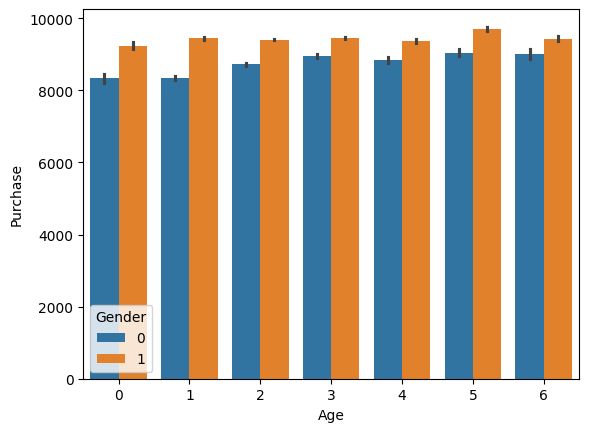

In [175]:
##Visualisation Age vs Purchased
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df_train)


## Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

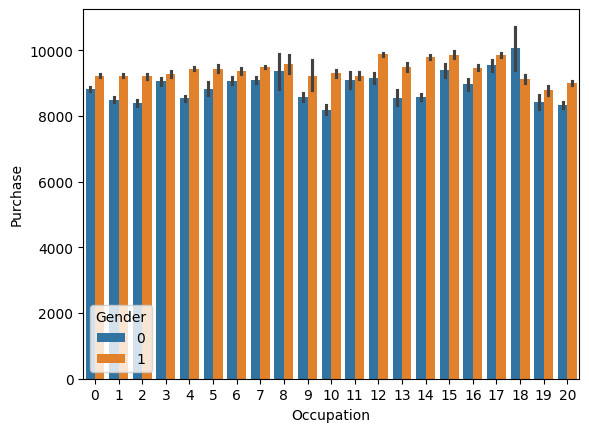

In [176]:
## Visualization of Purchase with occupation
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df_train)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

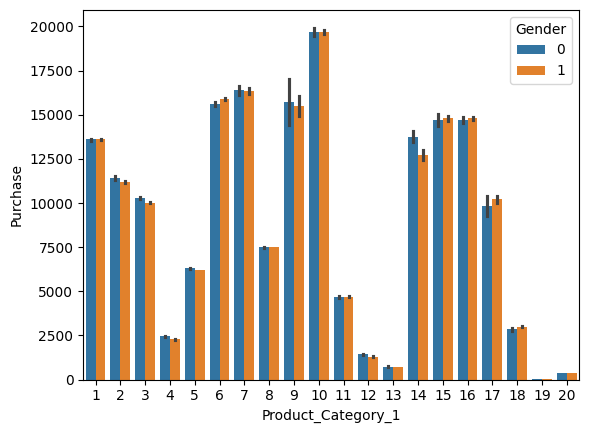

In [177]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df_train)


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

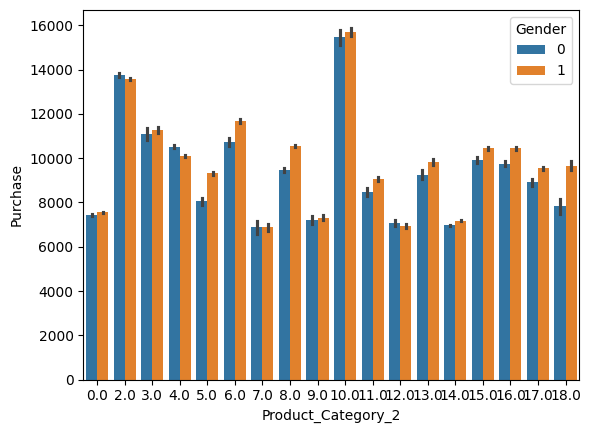

In [178]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df_train)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

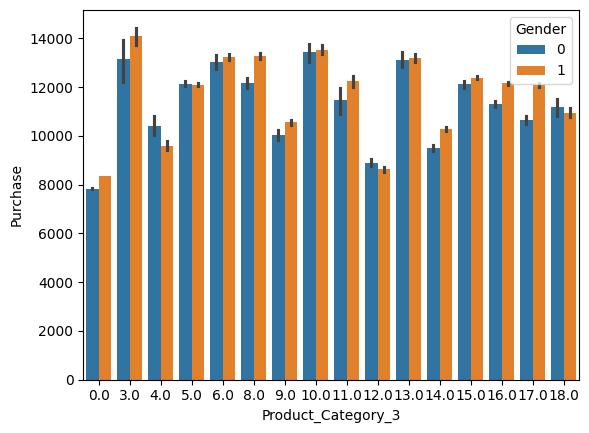

In [179]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df_train)

In [180]:
df_train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,0,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,0,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,1,6,16,C,4,0,8,0.0,0.0,7969


In [181]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [ ]:
df_train=df[~df['Purchase'].isnull()]

In [182]:
X=df_train.drop('Purchase',axis=1)

In [183]:
X.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,0,0,10,A,2,0,3,0.0,0.0
1,1000001,0,0,10,A,2,0,1,6.0,14.0
2,1000001,0,0,10,A,2,0,12,0.0,0.0
3,1000001,0,0,10,A,2,0,12,14.0,0.0
4,1000002,1,6,16,C,4,0,8,0.0,0.0


In [185]:
X.shape

(550068, 10)

In [186]:
y=df_train['Purchase']

In [187]:
y.shape

(550068,)

In [188]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [198]:
df.columns


Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [191]:
X_train.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 368545 entries, 396876 to 121958
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     368545 non-null  int64  
 1   Gender                      368545 non-null  int64  
 2   Age                         368545 non-null  int64  
 3   Occupation                  368545 non-null  int64  
 4   City_Category               368545 non-null  object 
 5   Stay_In_Current_City_Years  368545 non-null  int64  
 6   Marital_Status              368545 non-null  int64  
 7   Product_Category_1          368545 non-null  int64  
 8   Product_Category_2          368545 non-null  float64
 9   Product_Category_3          368545 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 30.9+ MB


In [192]:
X_train.drop('User_ID',axis=1,inplace=True)
X_test.drop('User_ID',axis=1,inplace=True)

In [194]:
X_train.dtypes


Gender                          int64
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [200]:
# One-hot encode city
X_train = pd.get_dummies(X_train, columns=['City_Category'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['City_Category'], drop_first=True)

# Align the columns of the test set with the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train.info()

KeyError: "None of [Index(['City_Category'], dtype='object')] are in the [columns]"

In [193]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: could not convert string to float: 'B'

In [ ]:
## train ur model